# import necessary libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Load the dataset

In [2]:

dataset = pd.read_csv('creditcard.csv')


# Data Preprocessing

In [3]:
# for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)



Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Exploratory Data Analysis (EDA)

In [5]:
some_of_columns = ['V1', 'V2', 'Amount', 'Class']

##  pairplot 


c:\Users\Softlaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


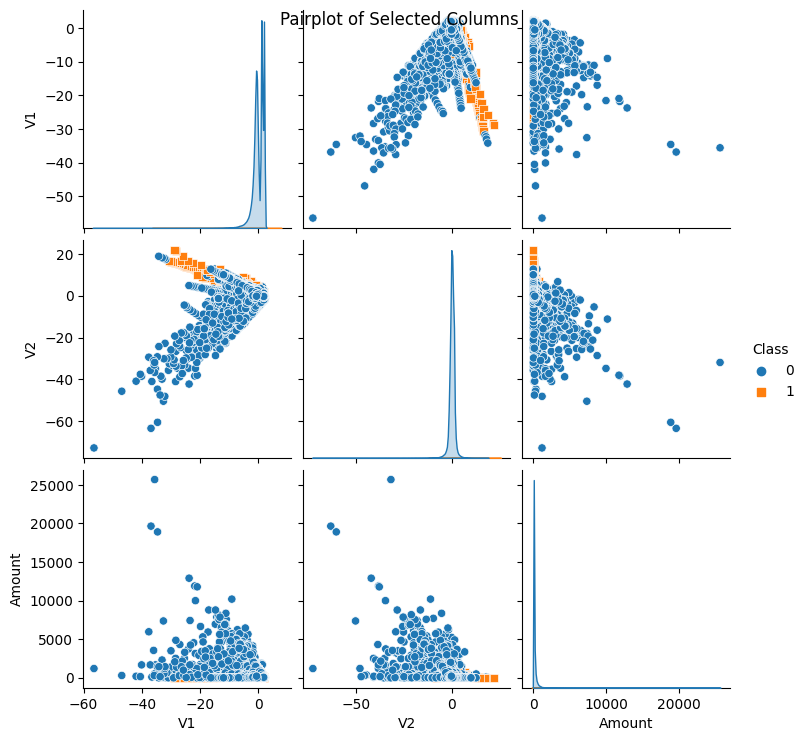

In [7]:
sns.pairplot(dataset[some_of_columns], hue='Class', markers=['o', 's'], diag_kind='kde')
plt.suptitle("Pairplot of Selected Columns")
plt.show()

## box plot

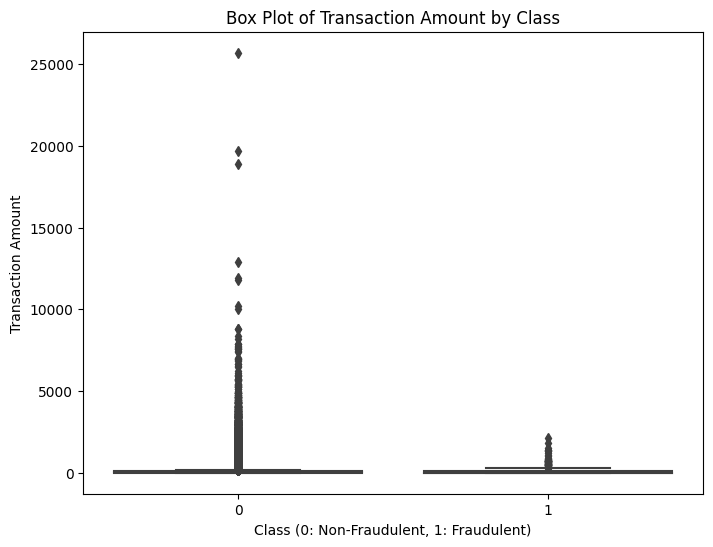

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=dataset)
plt.title("Box Plot of Transaction Amount by Class")
plt.xlabel("Class (0: Non-Fraudulent, 1: Fraudulent)")
plt.ylabel("Transaction Amount")
plt.show()

## bar plot

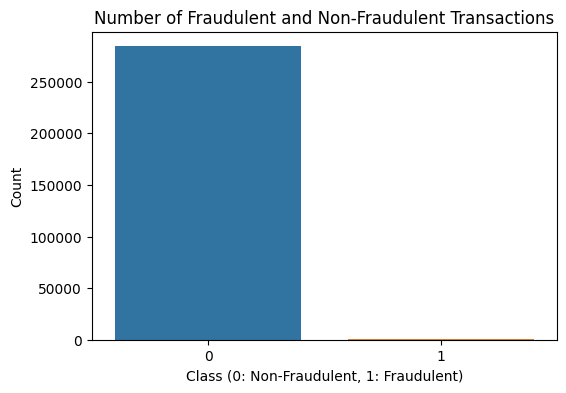

In [9]:
fraud_counts = dataset['Class'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Number of Fraudulent and Non-Fraudulent Transactions")
plt.xlabel("Class (0: Non-Fraudulent, 1: Fraudulent)")
plt.ylabel("Count")
plt.show()

# Feature Engineering

In [10]:
# all columns except 'Time' and 'Class' as features
X = dataset.drop(['Time', 'Class'], axis=1)
y = dataset['Class']

# Model Selection (LR)

In [15]:

model = LogisticRegression(random_state=42)

# Training and Testing

In [18]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

# Make predictions

In [19]:
y_pred = model.predict(X_test)


In [20]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56855     9]
 [   41    57]]
Accuracy Score: 0.9991222218320986
